In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
wine=pd.read_csv('/content/wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams["figure.dpi"]=300
%matplotlib inline

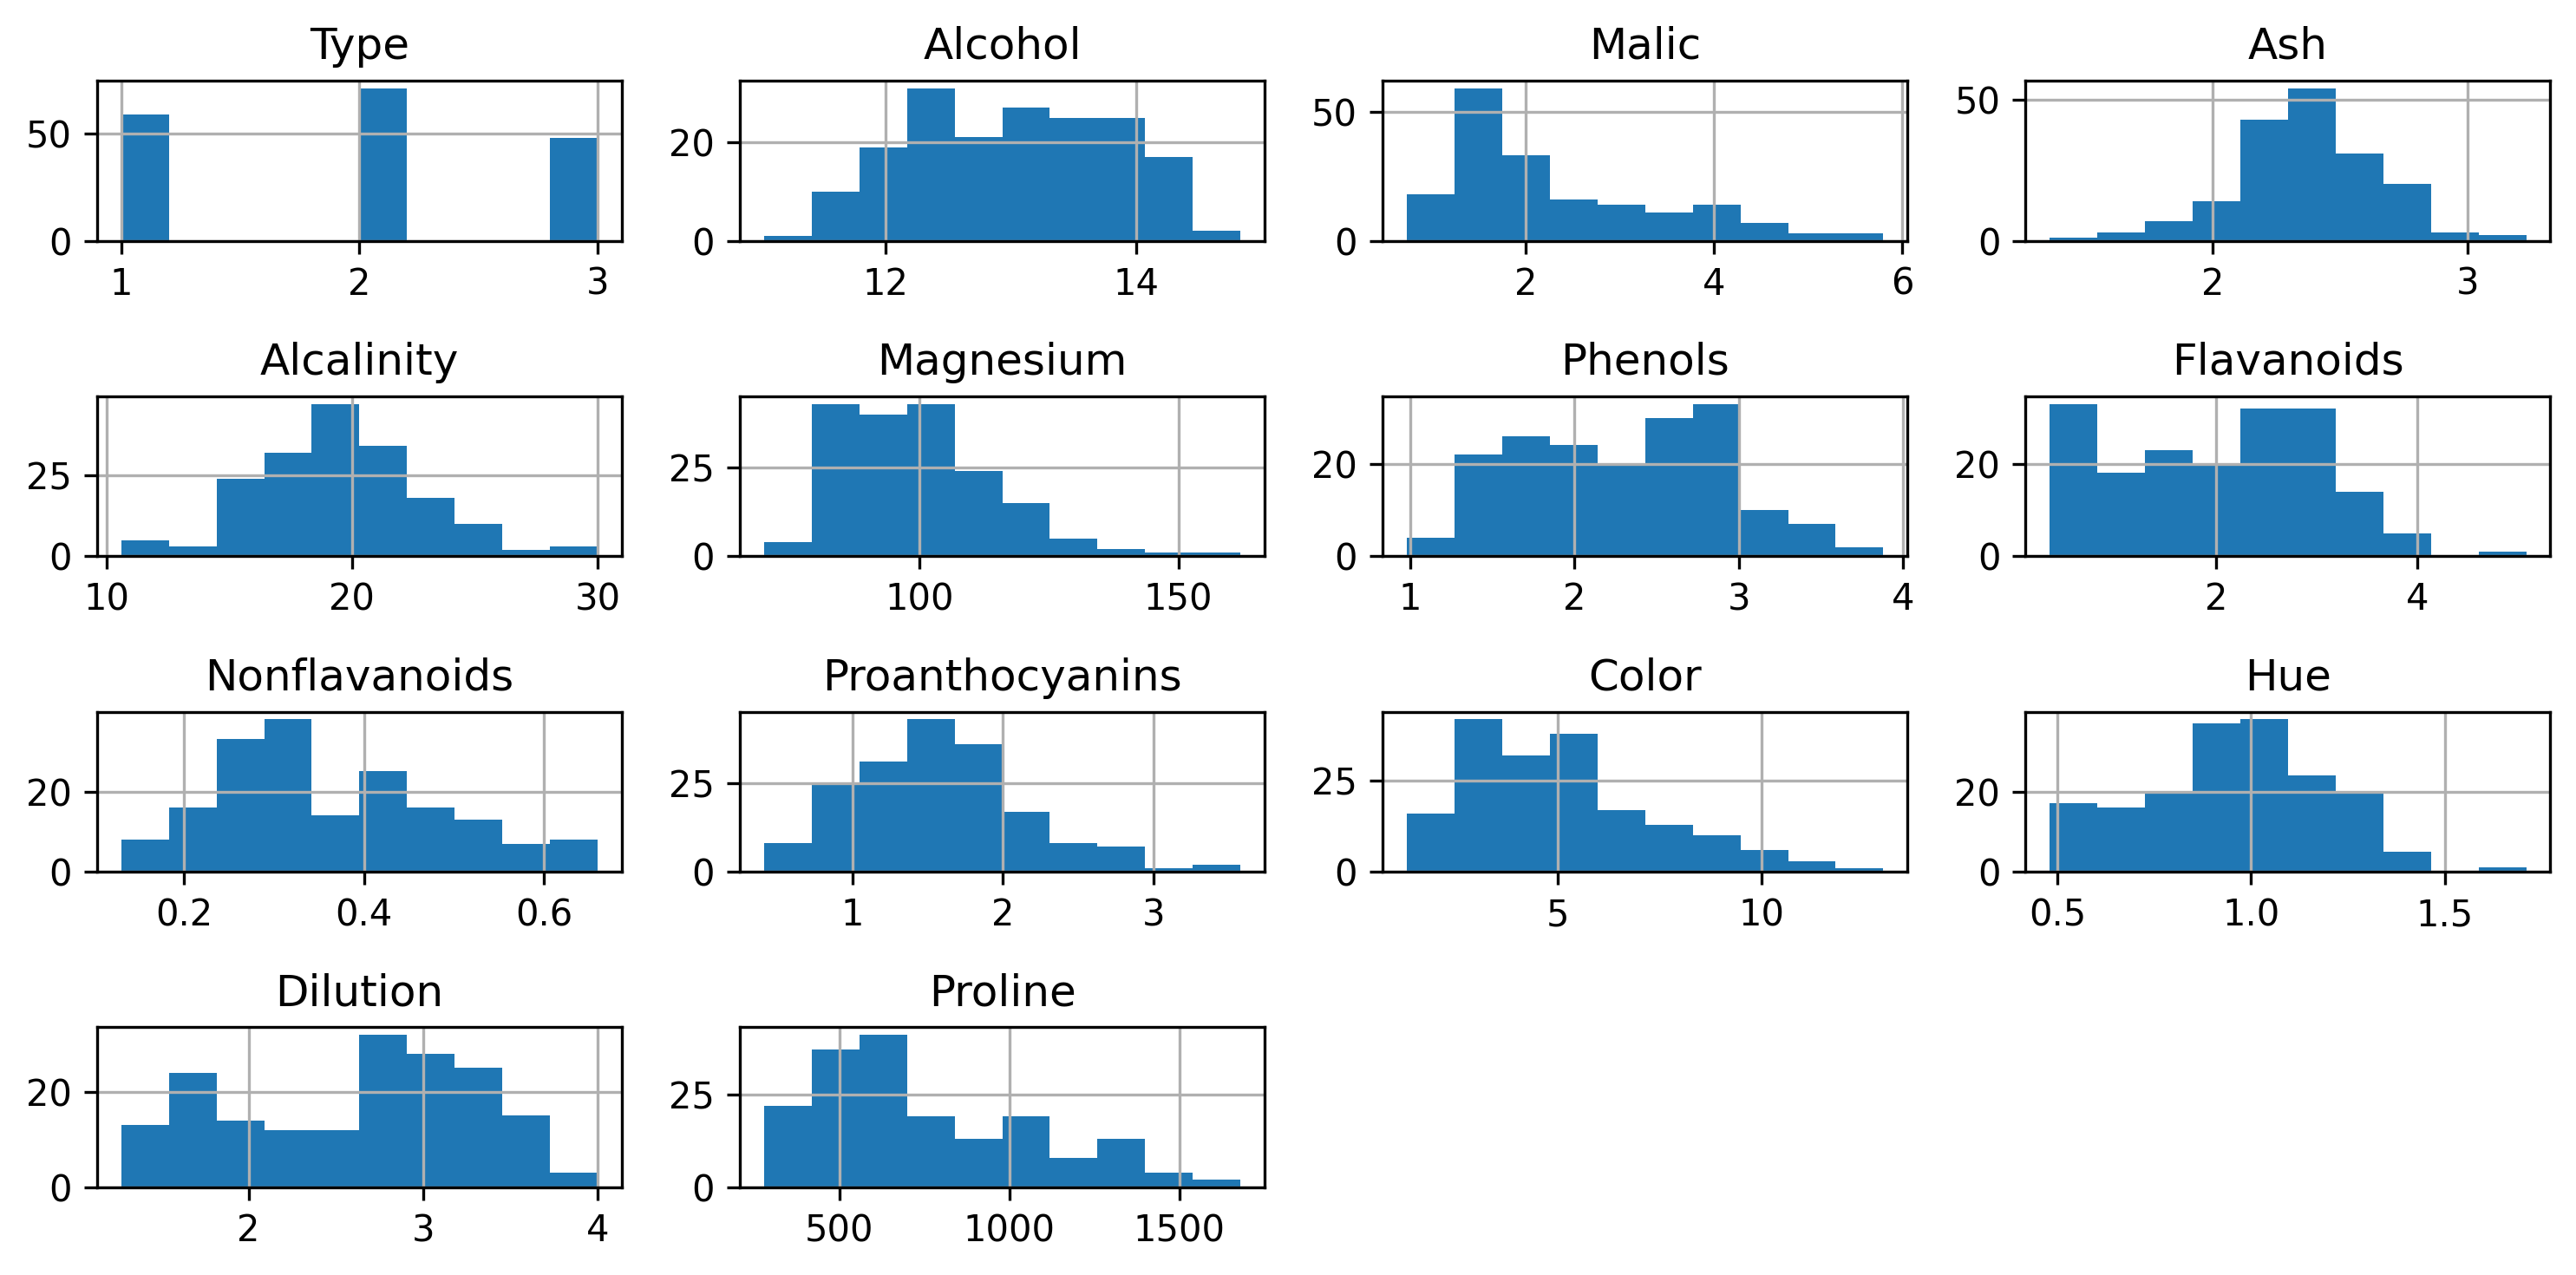

In [7]:
wine.hist()

plt.tight_layout()

<Axes: >

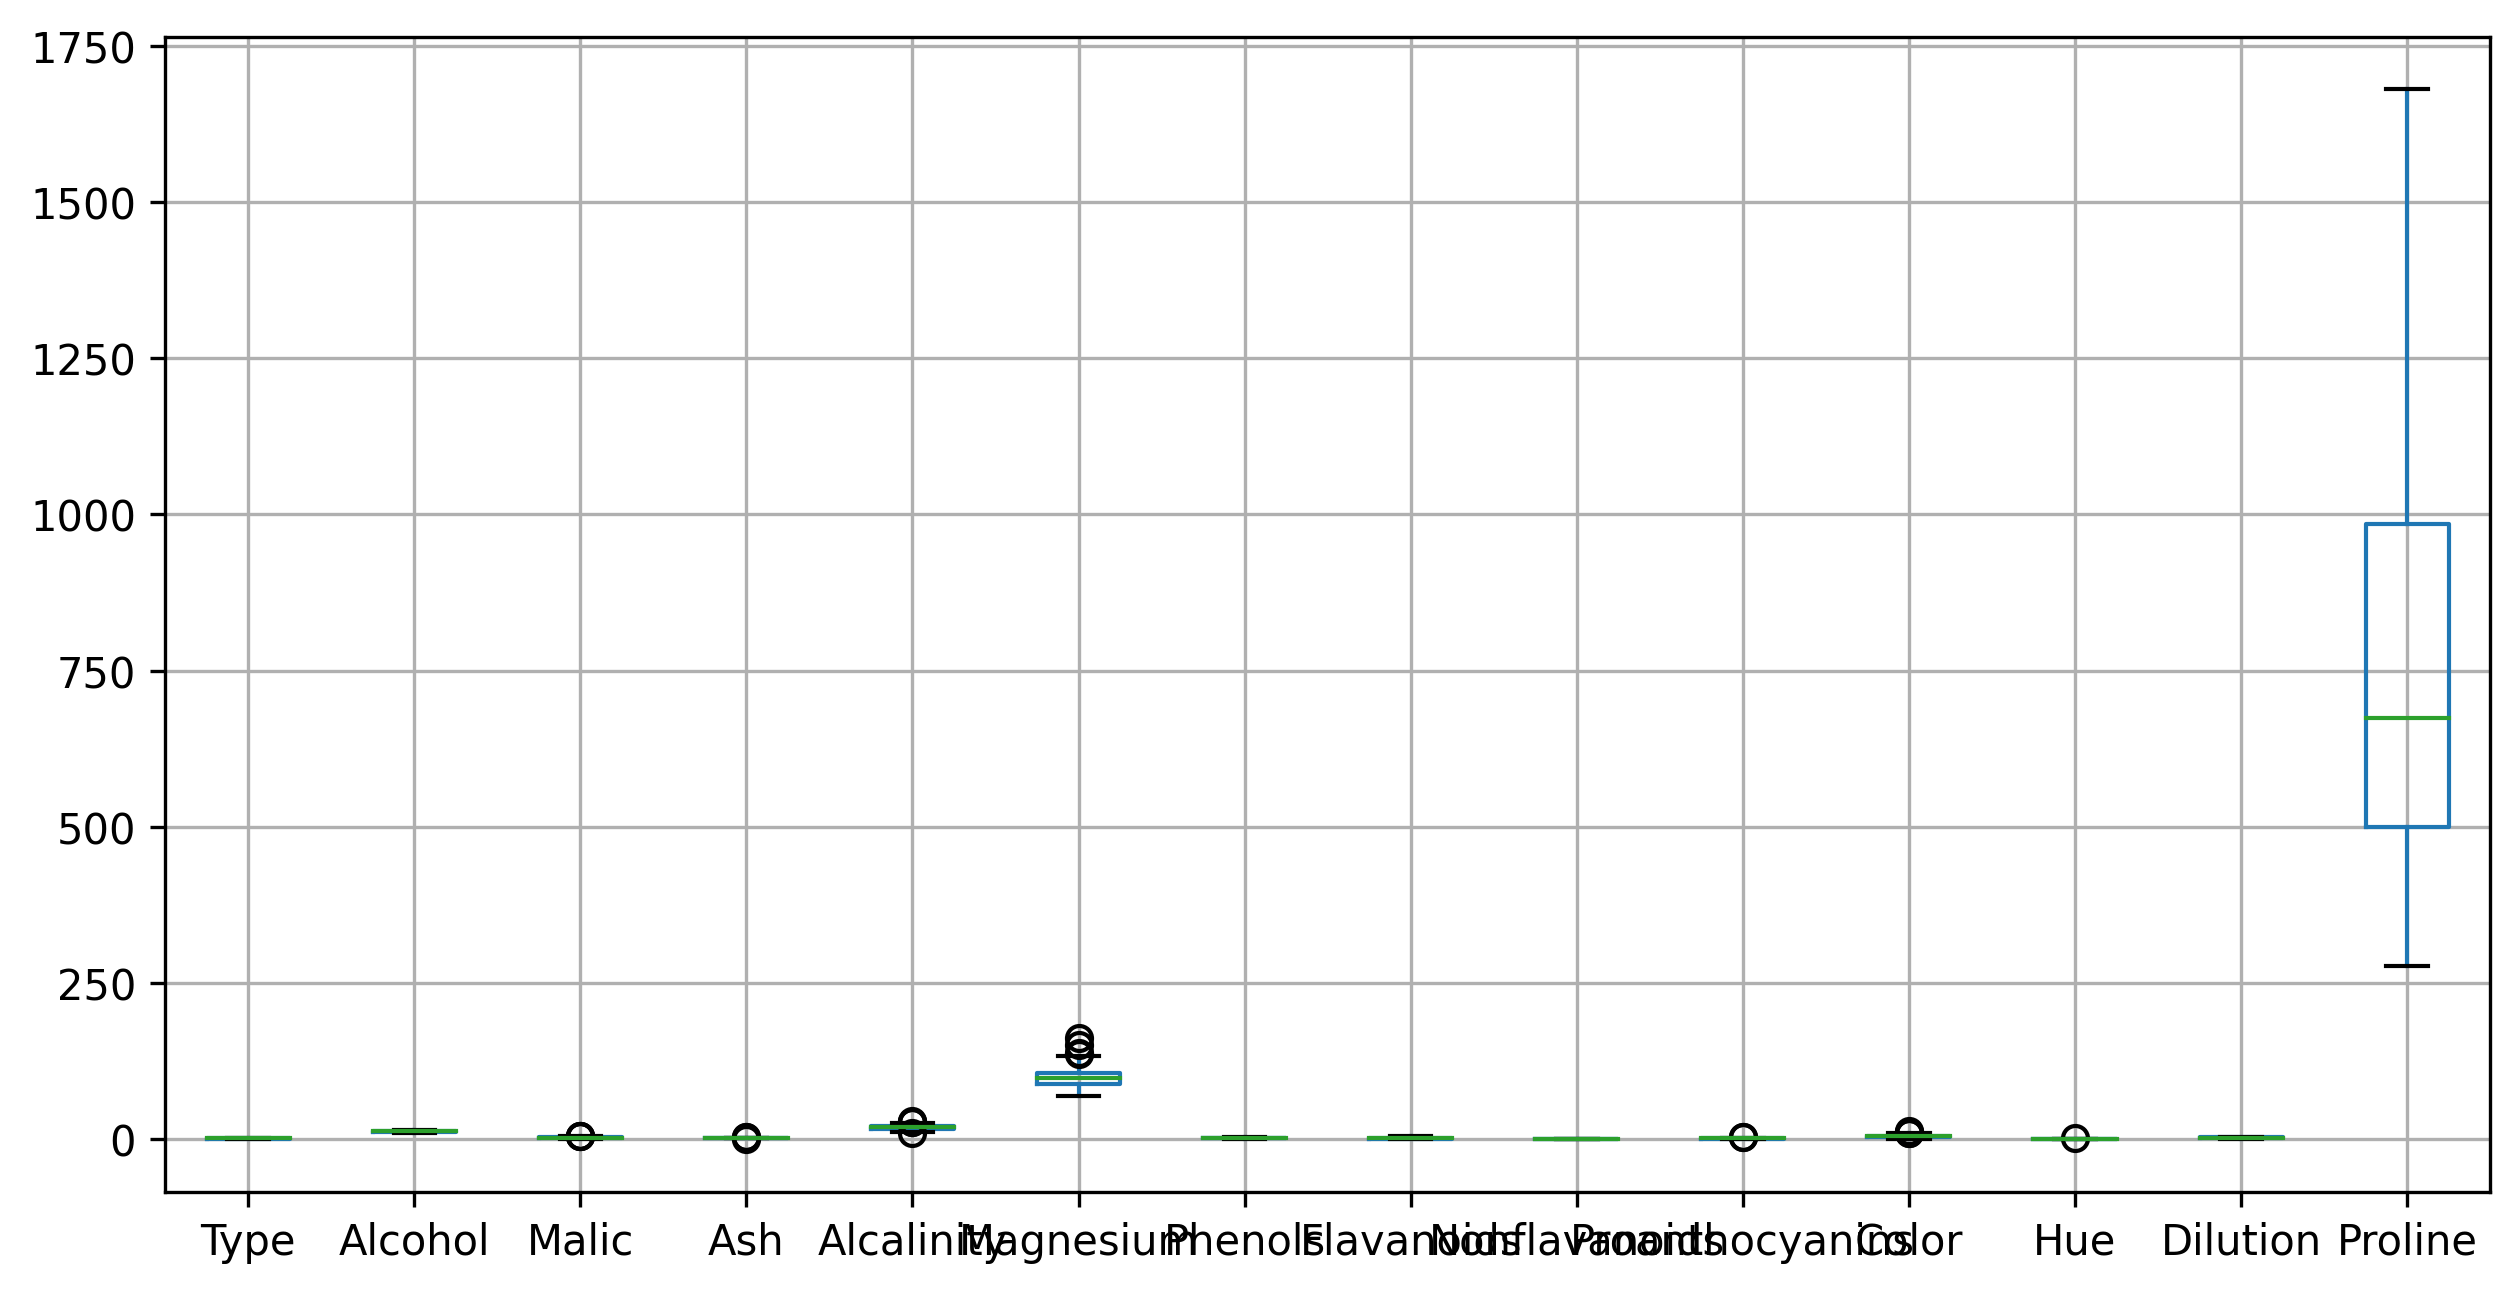

In [ ]:
wine.boxplot()

In [ ]:
sns.pairplot(wine)

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

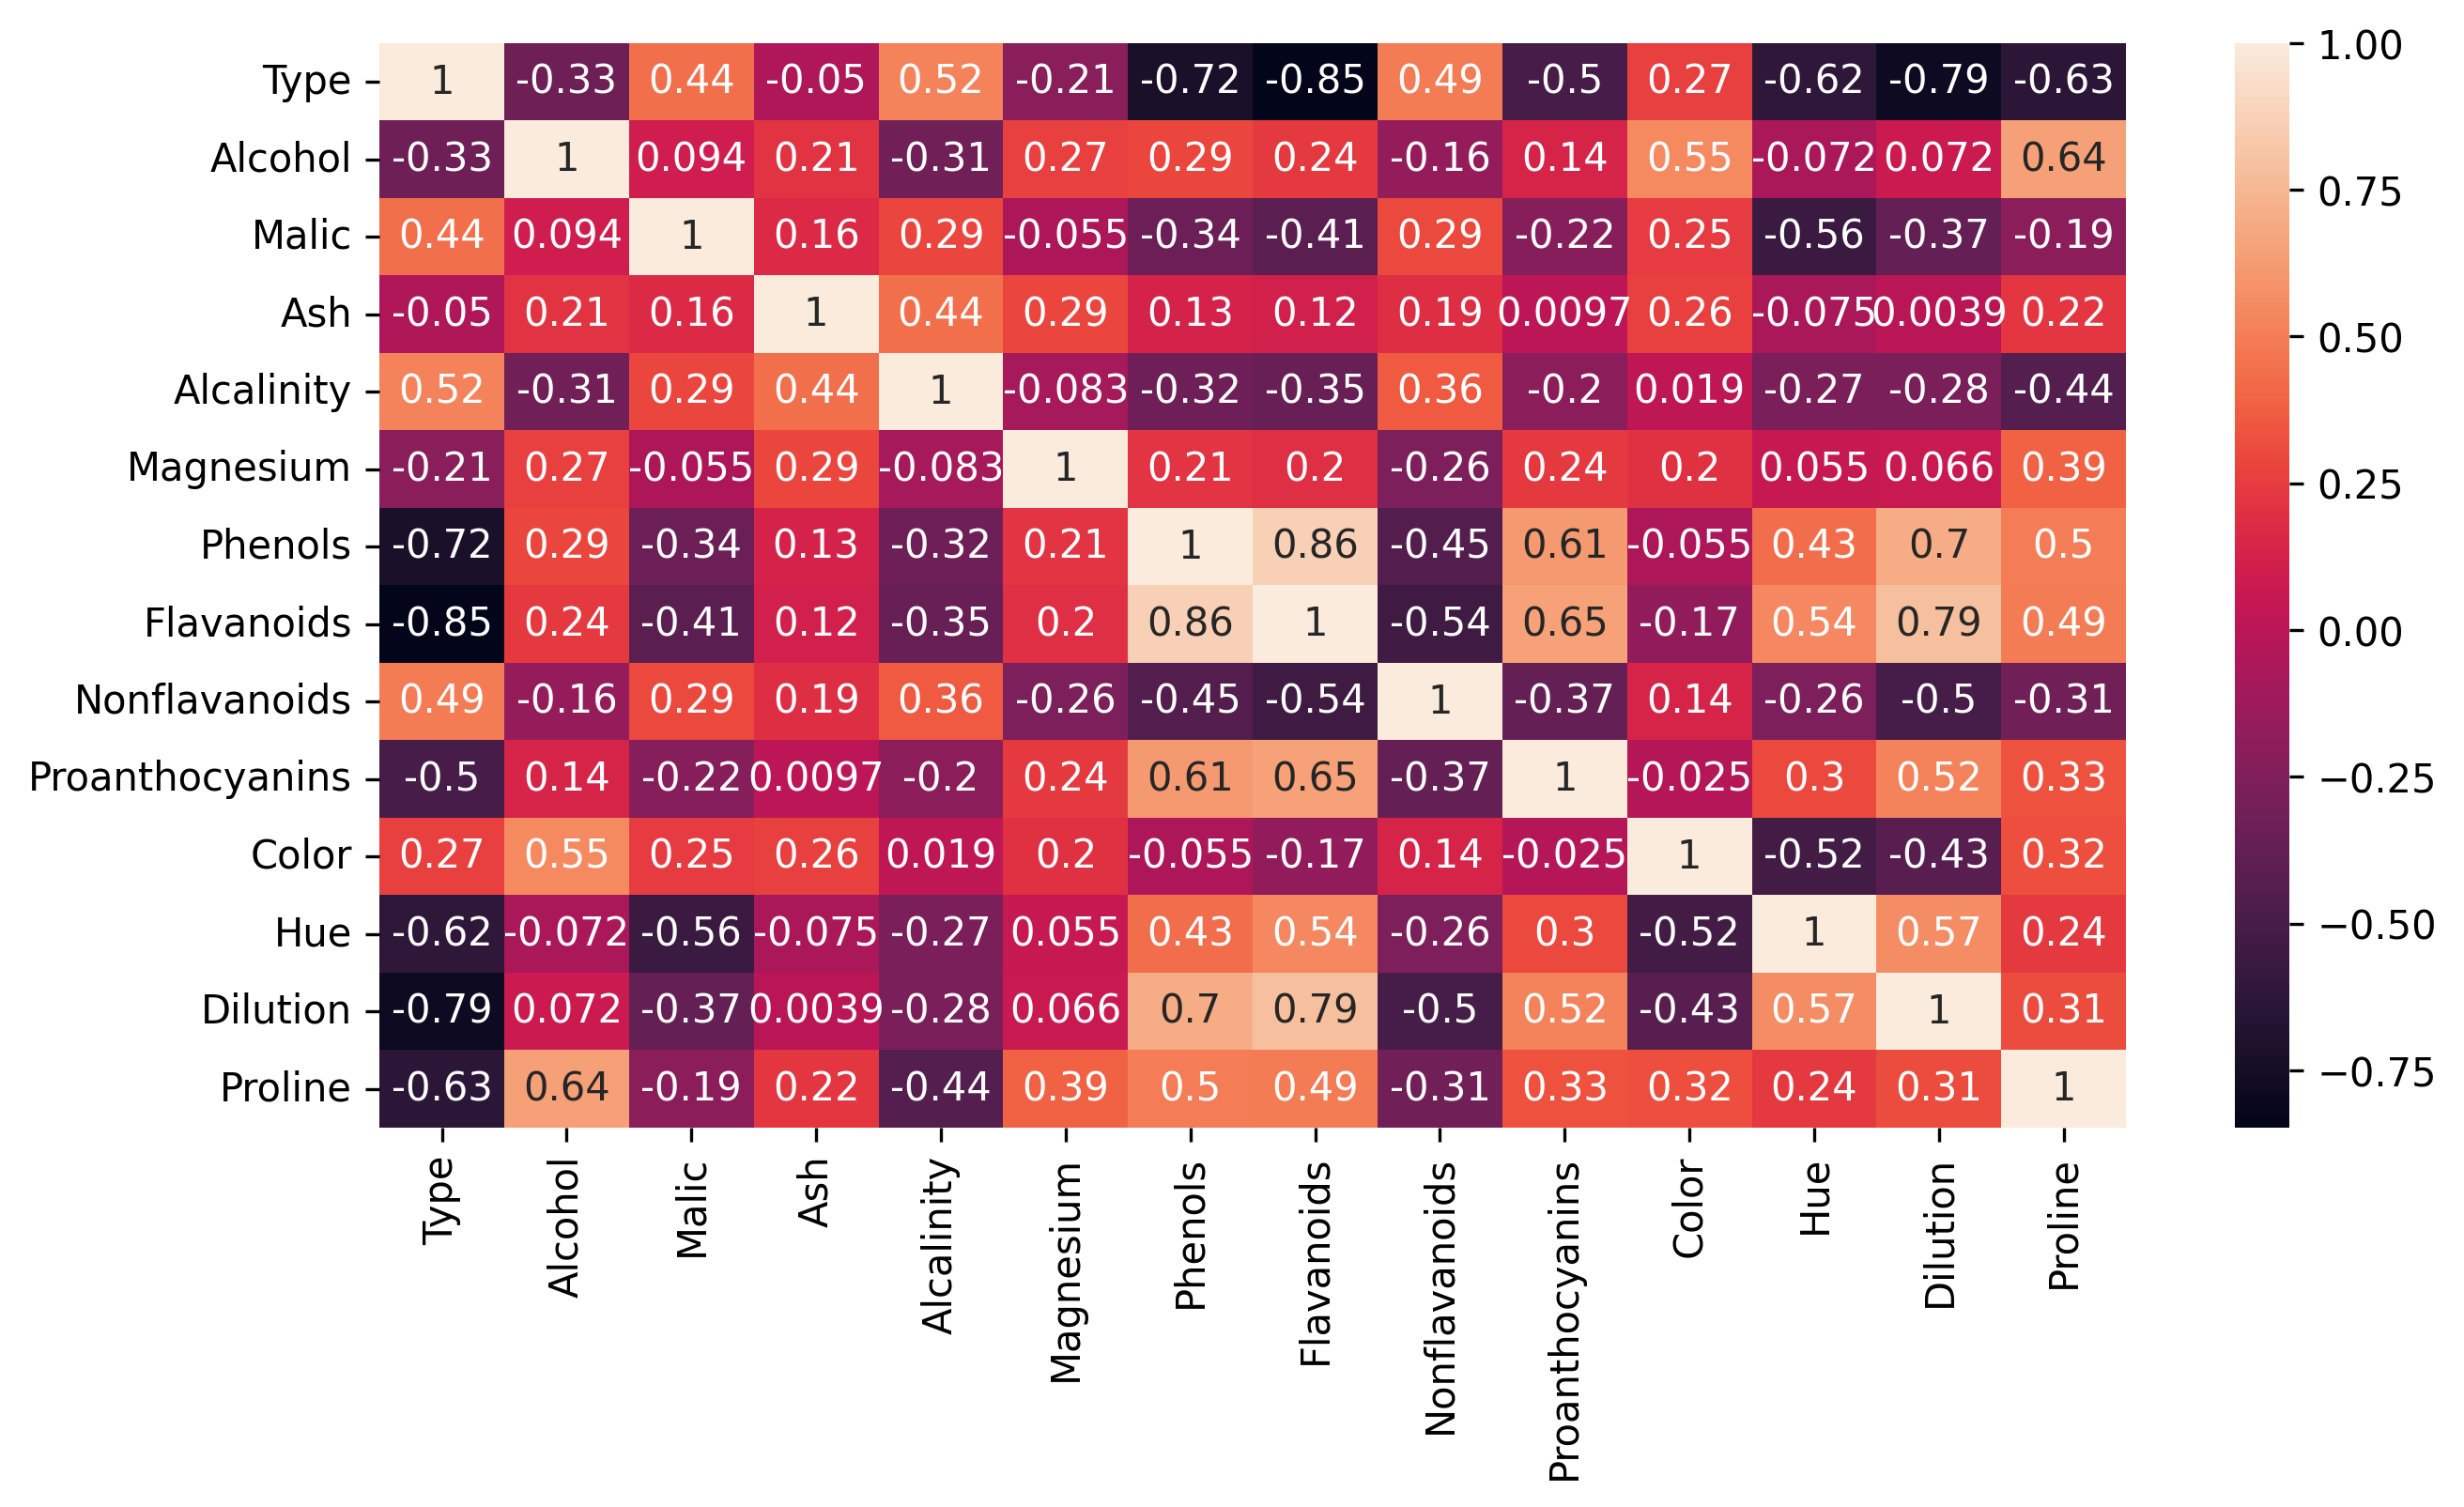

In [ ]:
sns.heatmap(wine.corr(),annot=True)

<Axes: xlabel='Type', ylabel='Flavanoids'>

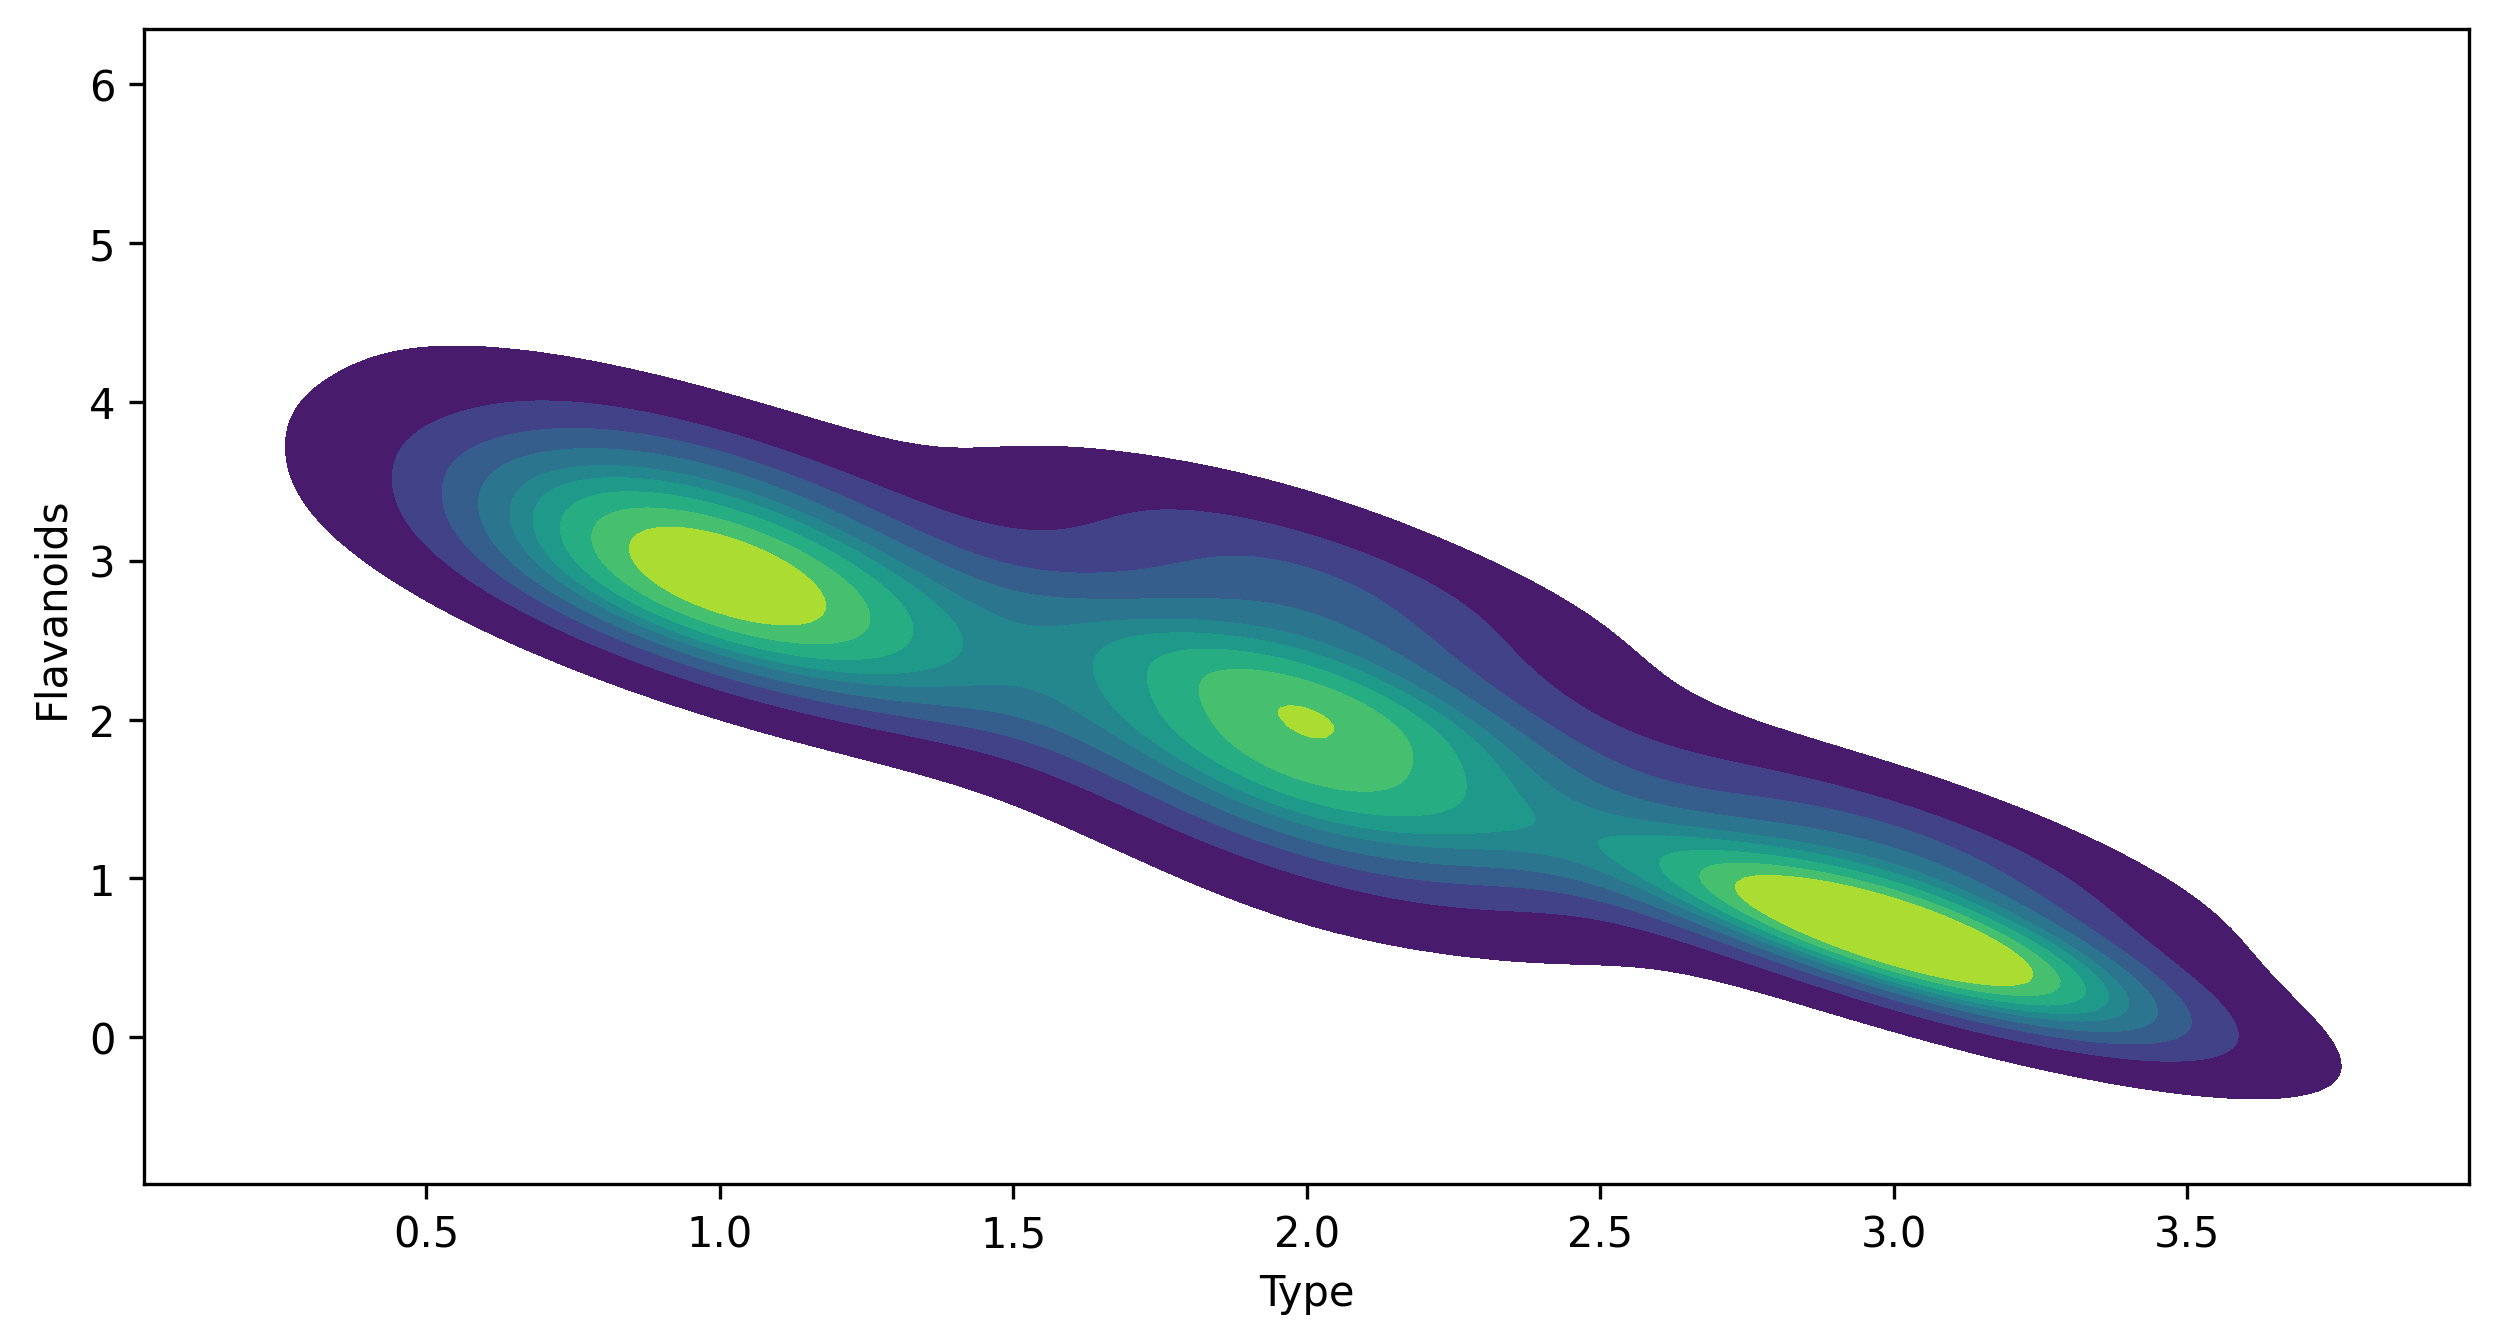

In [ ]:
import seaborn as sns

# Assuming 'feature1' and 'feature2' are the columns you want to analyze
sns.kdeplot(x=wine['Type'], y=wine['Flavanoids'], cmap='viridis', fill=True)


In [8]:
# 1. Standardize the features
x = wine.drop('Type', axis=1) # Separate features from target variable
x = StandardScaler().fit_transform(x)

In [9]:
pca = PCA()
principalComponents = pca.fit_transform(x)

In [11]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [12]:
var = pca.explained_variance_ratio_

In [13]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [14]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [ 0.21353865,  0.536813

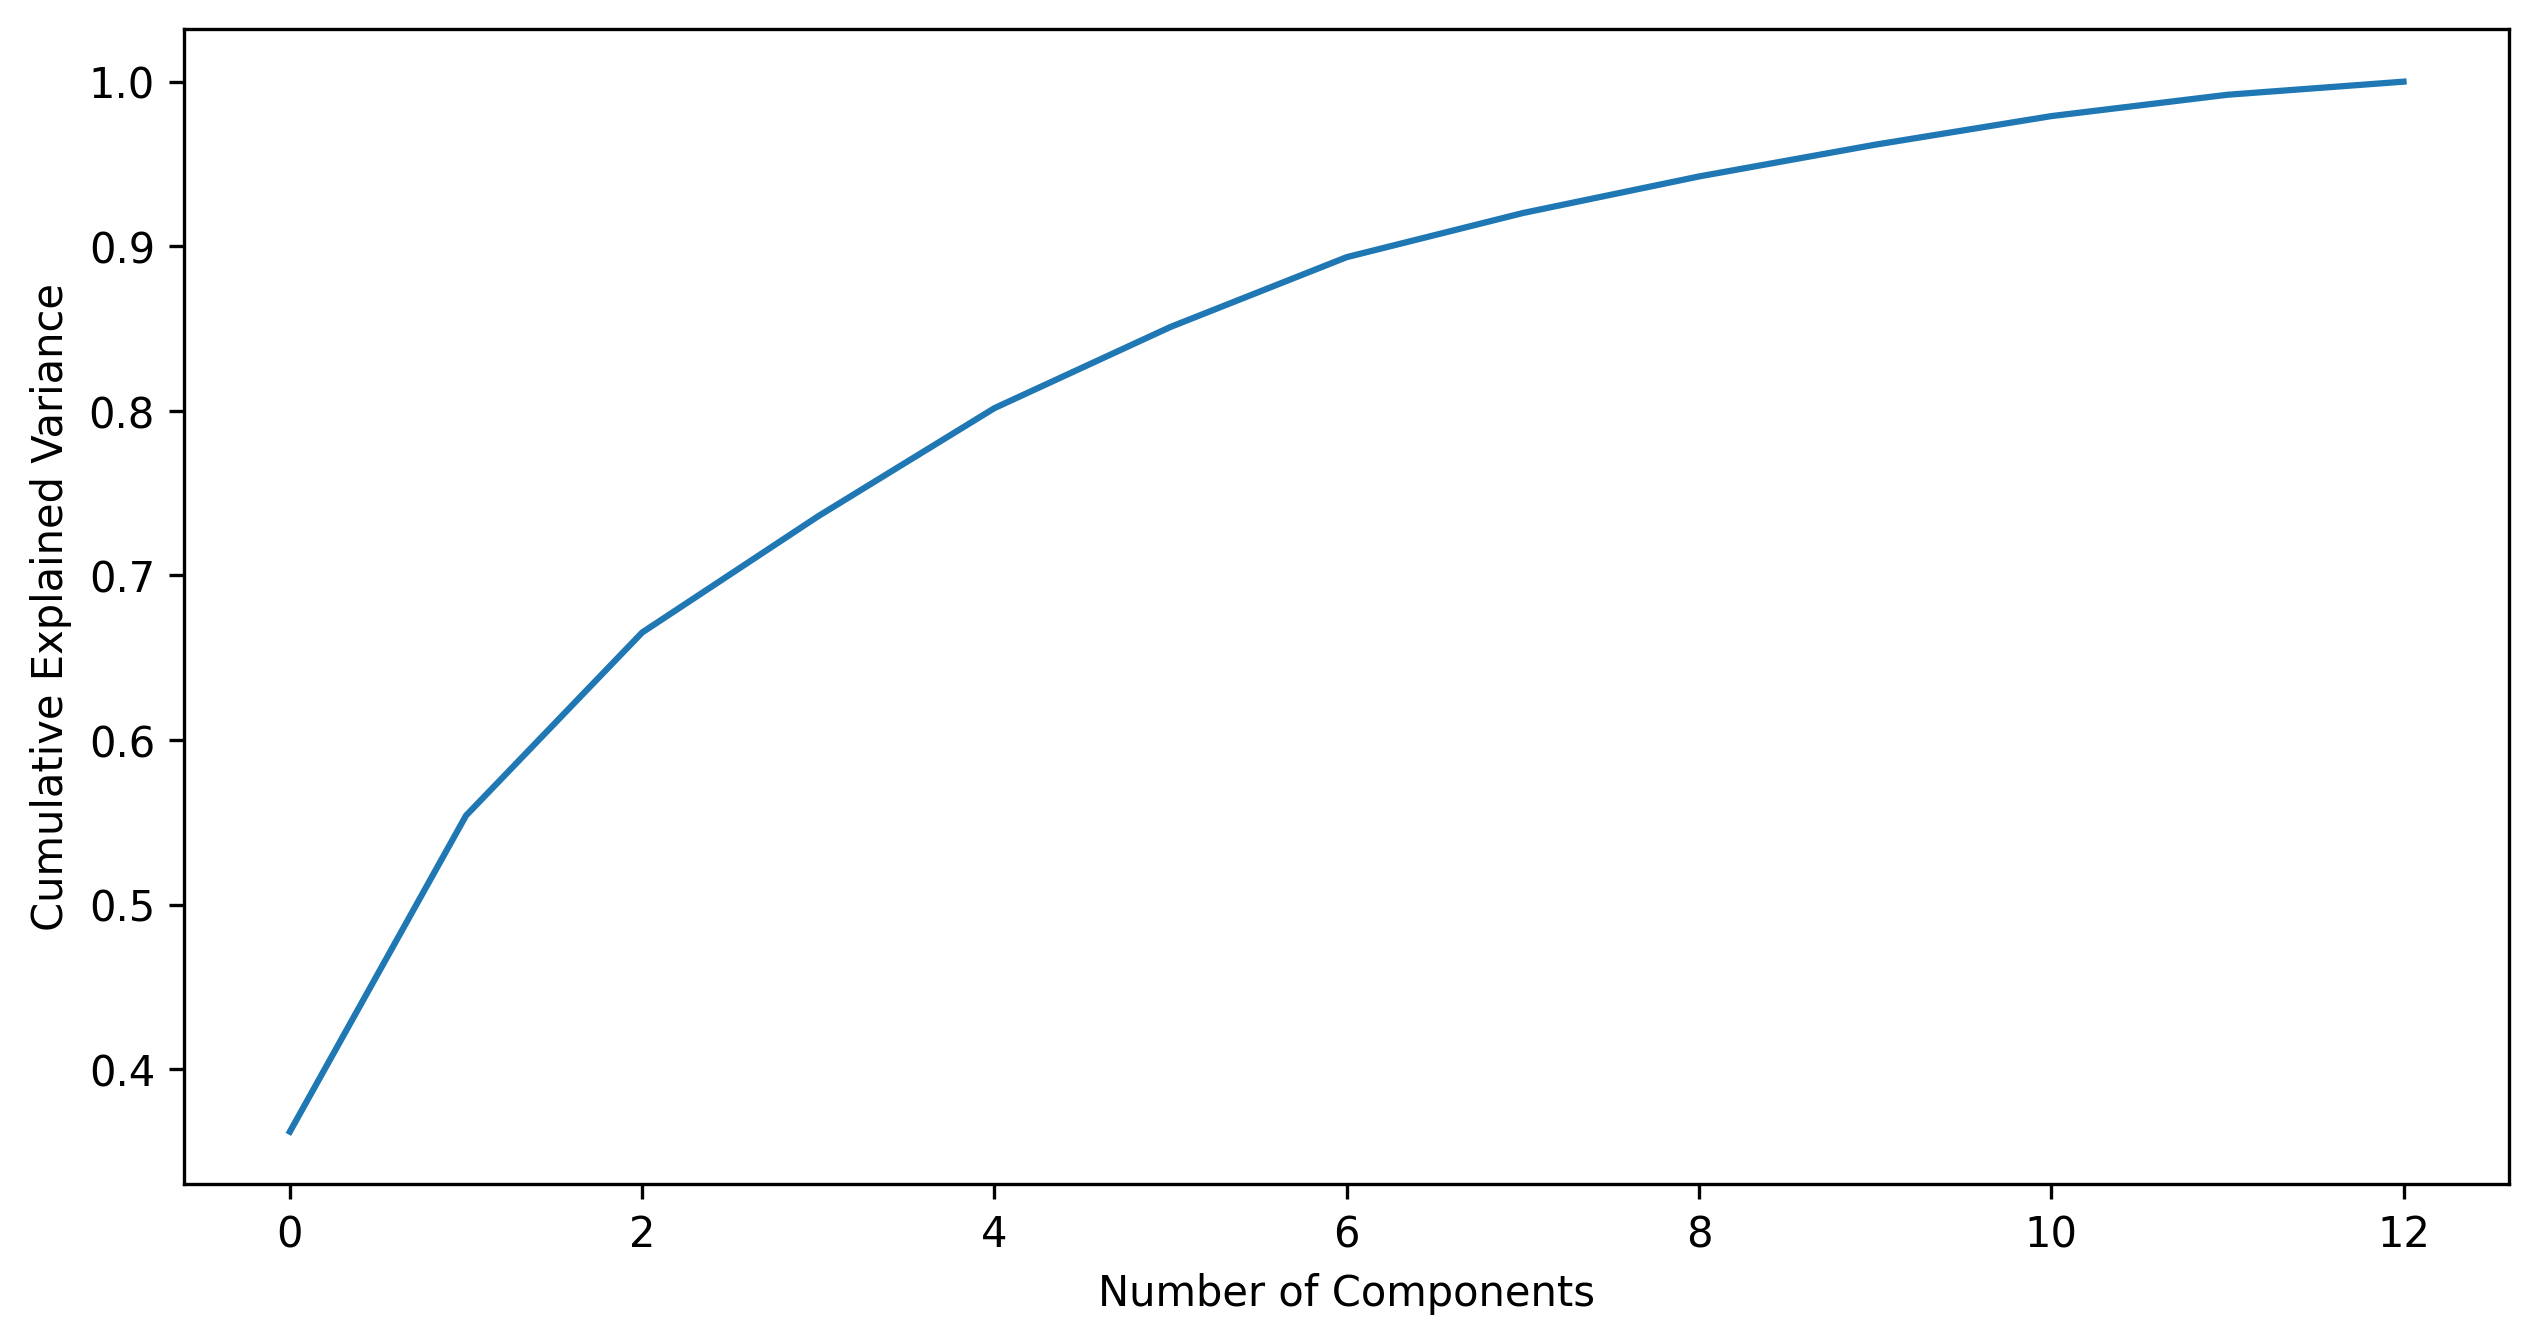

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [16]:
sns.pairplot(wine)

Output hidden; open in https://colab.research.google.com to view.

In [19]:
sns.pairplot(pd.DataFrame(pca.components_))

Clustering with  original data set

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

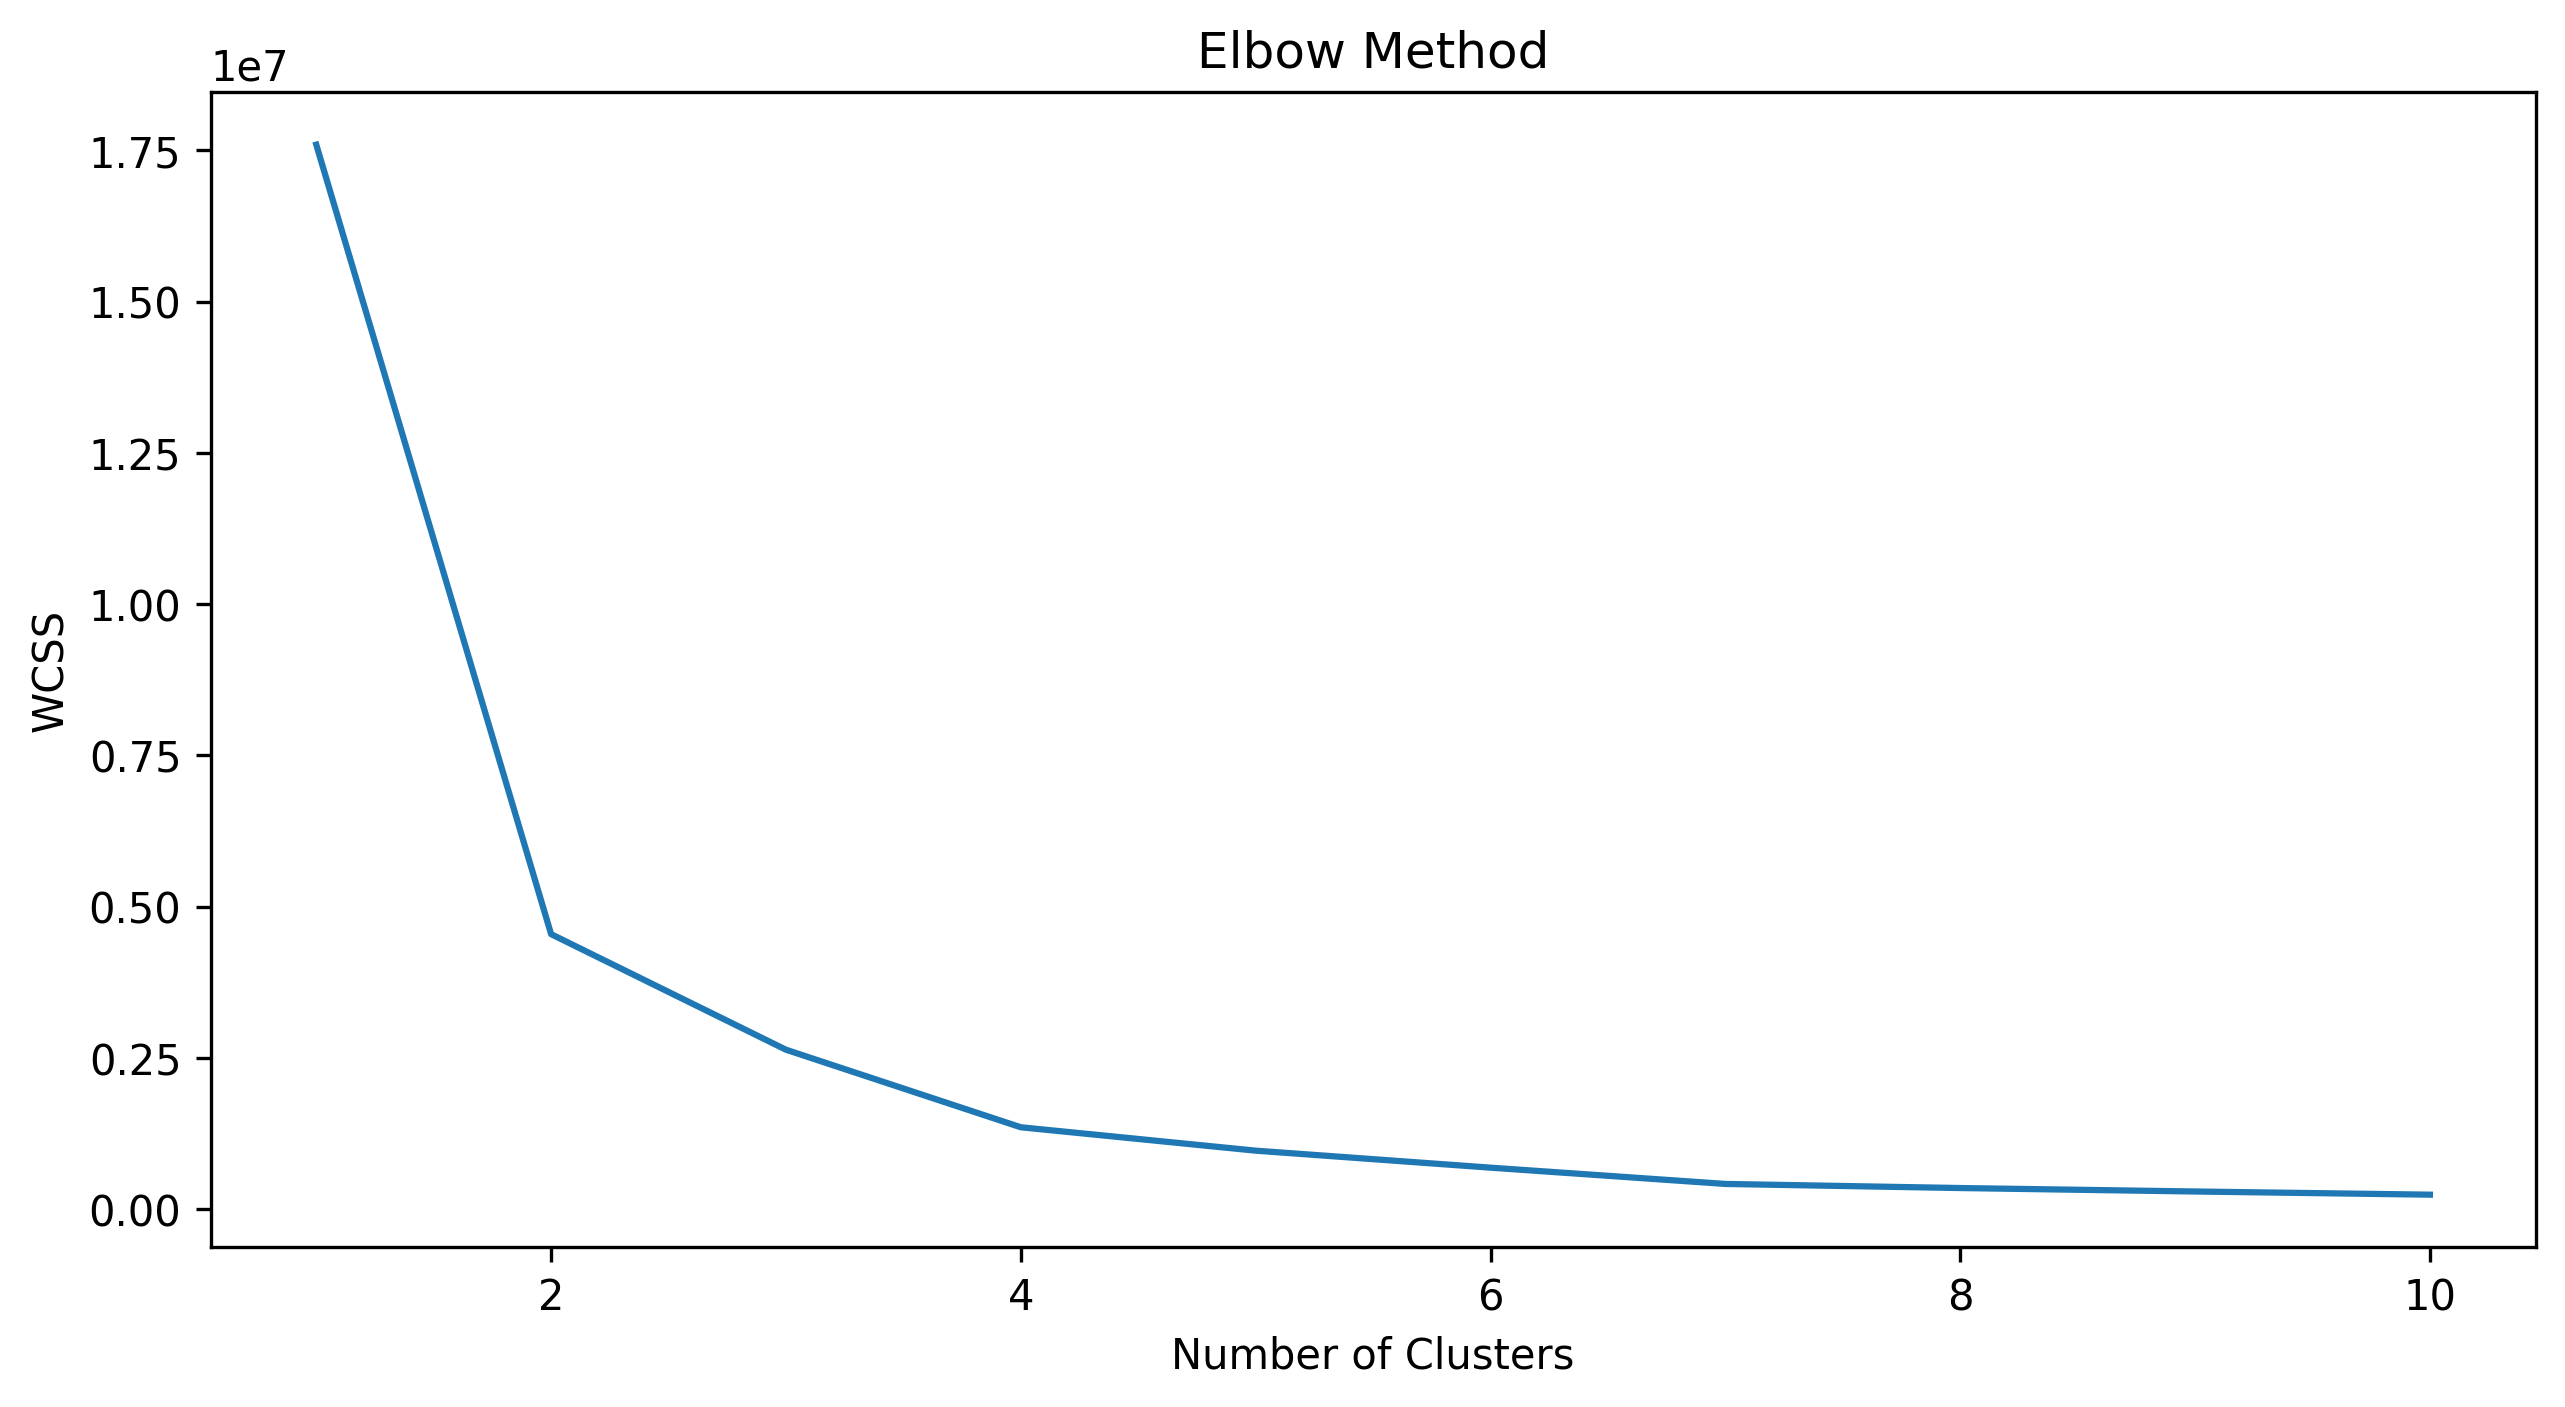

In [33]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(wine)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [40]:
# 1. Apply K-means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(wine)

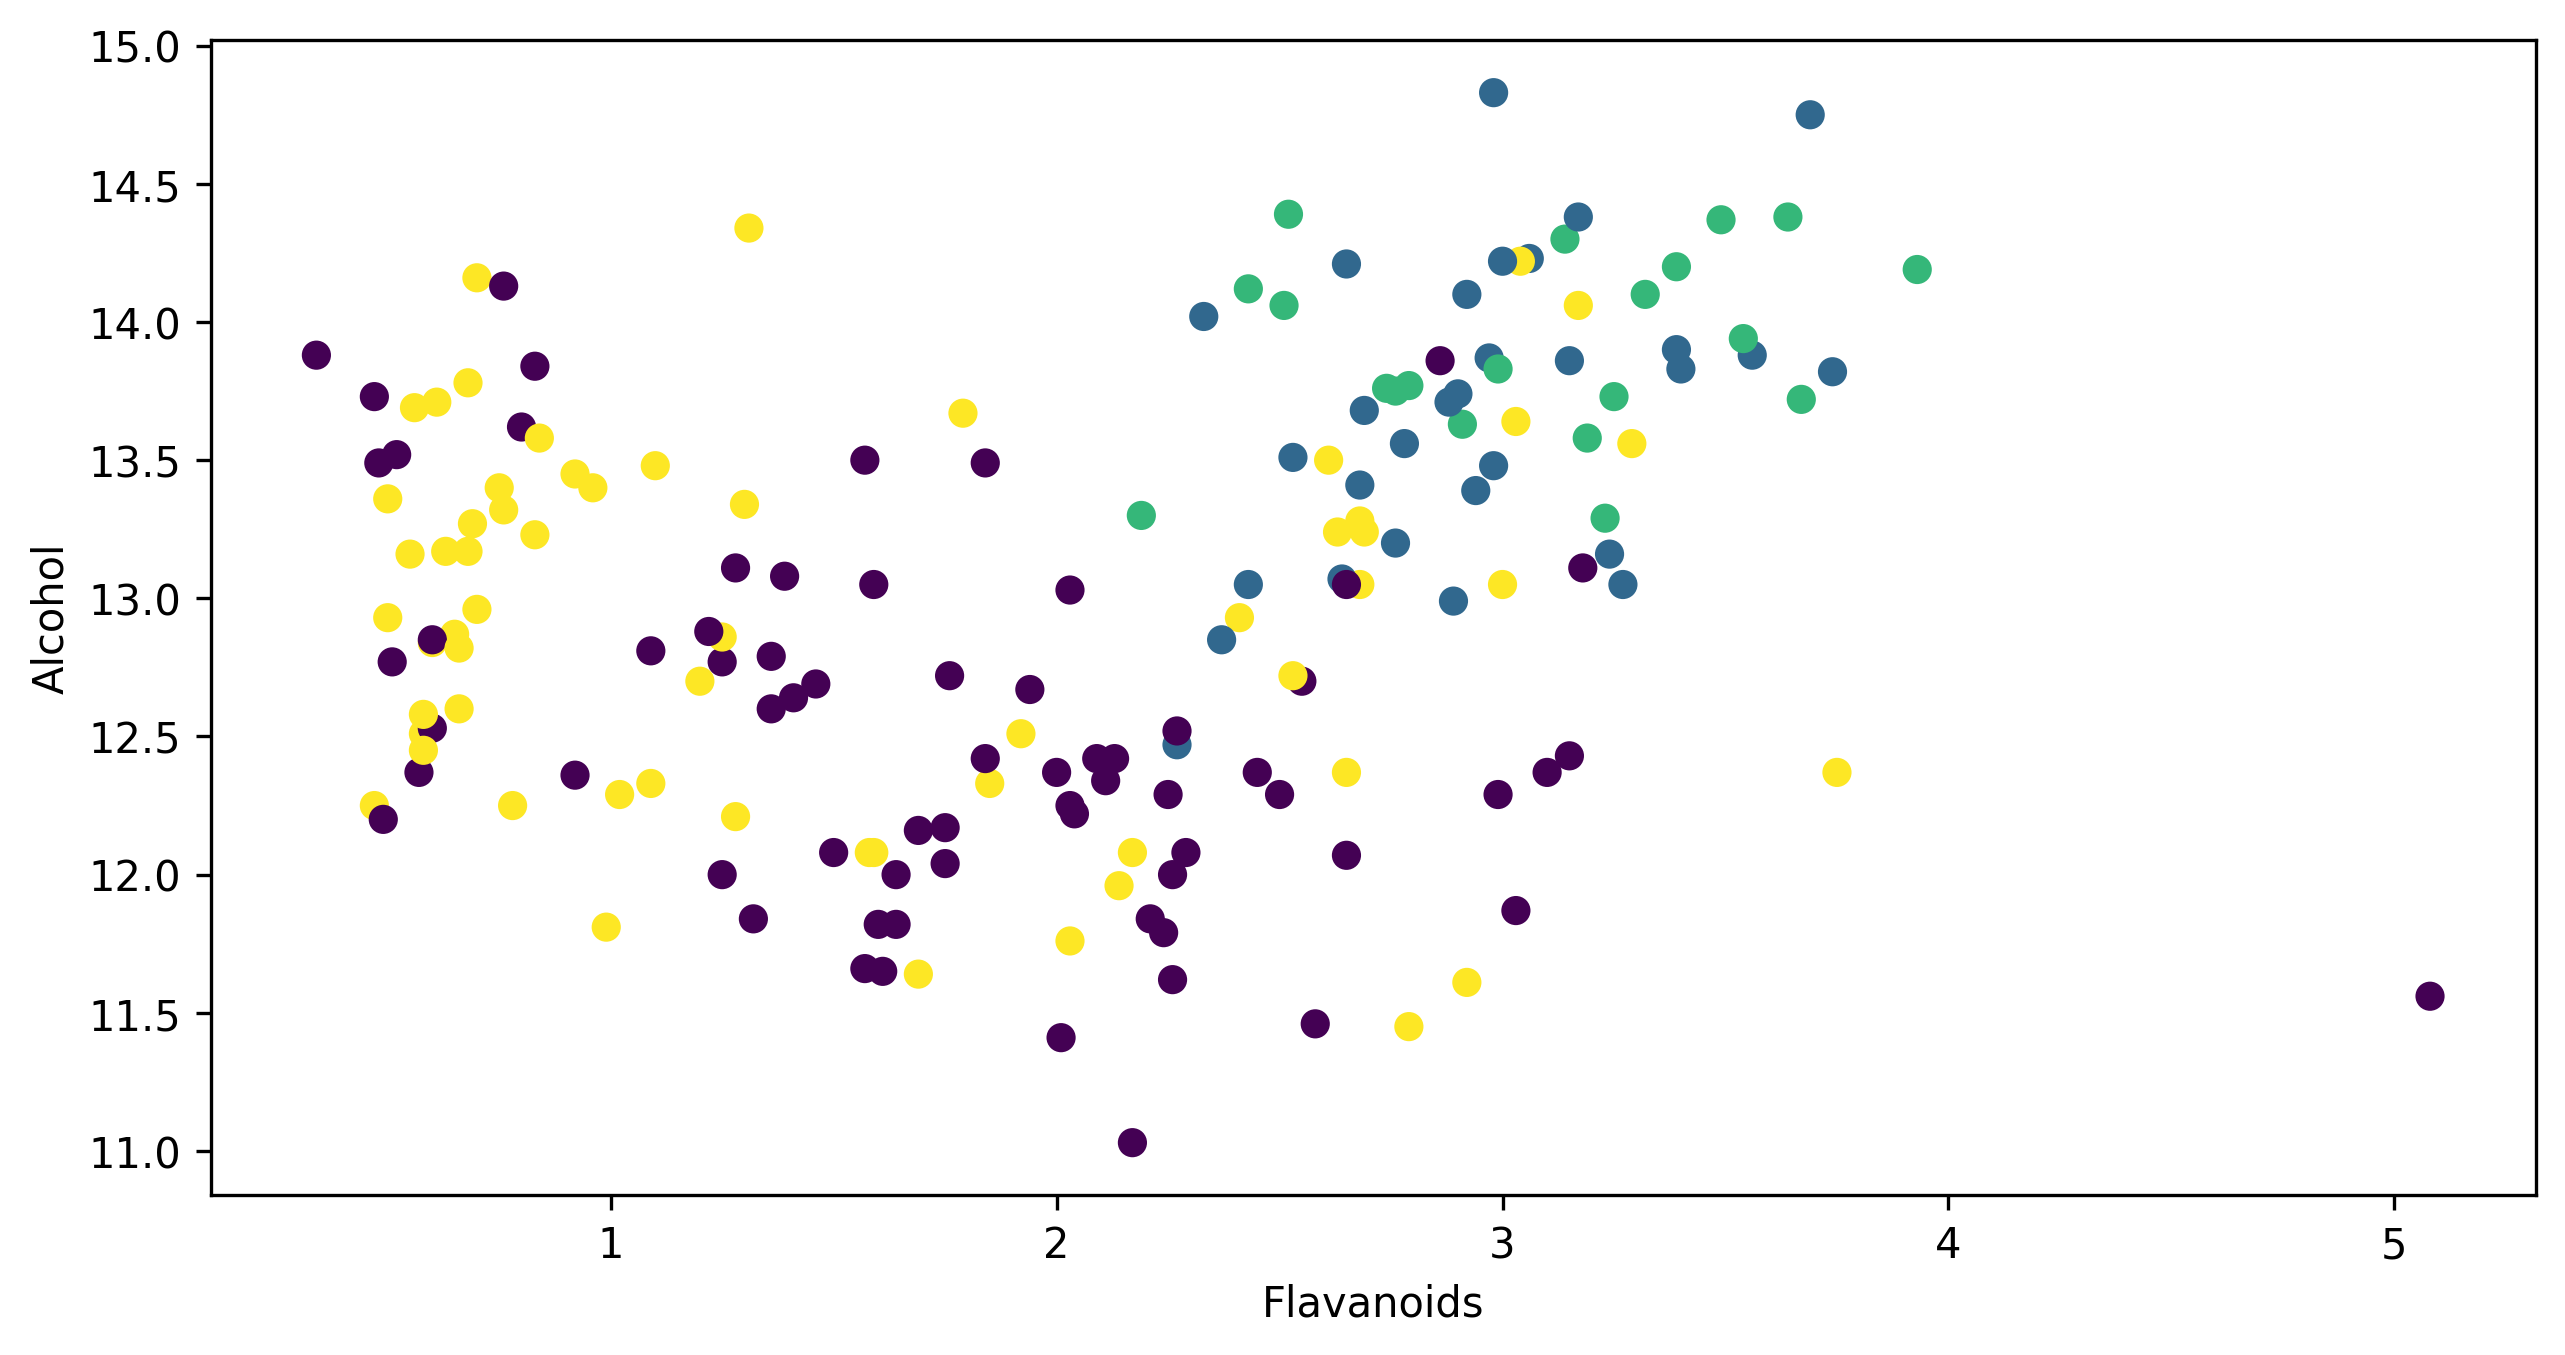

In [41]:
plt.scatter(wine['Flavanoids'], wine['Alcohol'], c=clusters)
plt.xlabel('Flavanoids')
plt.ylabel('Alcohol')
plt.show()

In [42]:
silhouette = silhouette_score(wine, clusters)
davies_bouldin = davies_bouldin_score(wine, clusters)

print(silhouette)
print(davies_bouldin)

0.5669299638574147
0.5486807260950938


In [ ]:
# 1. Apply K-means to PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(principalComponents)

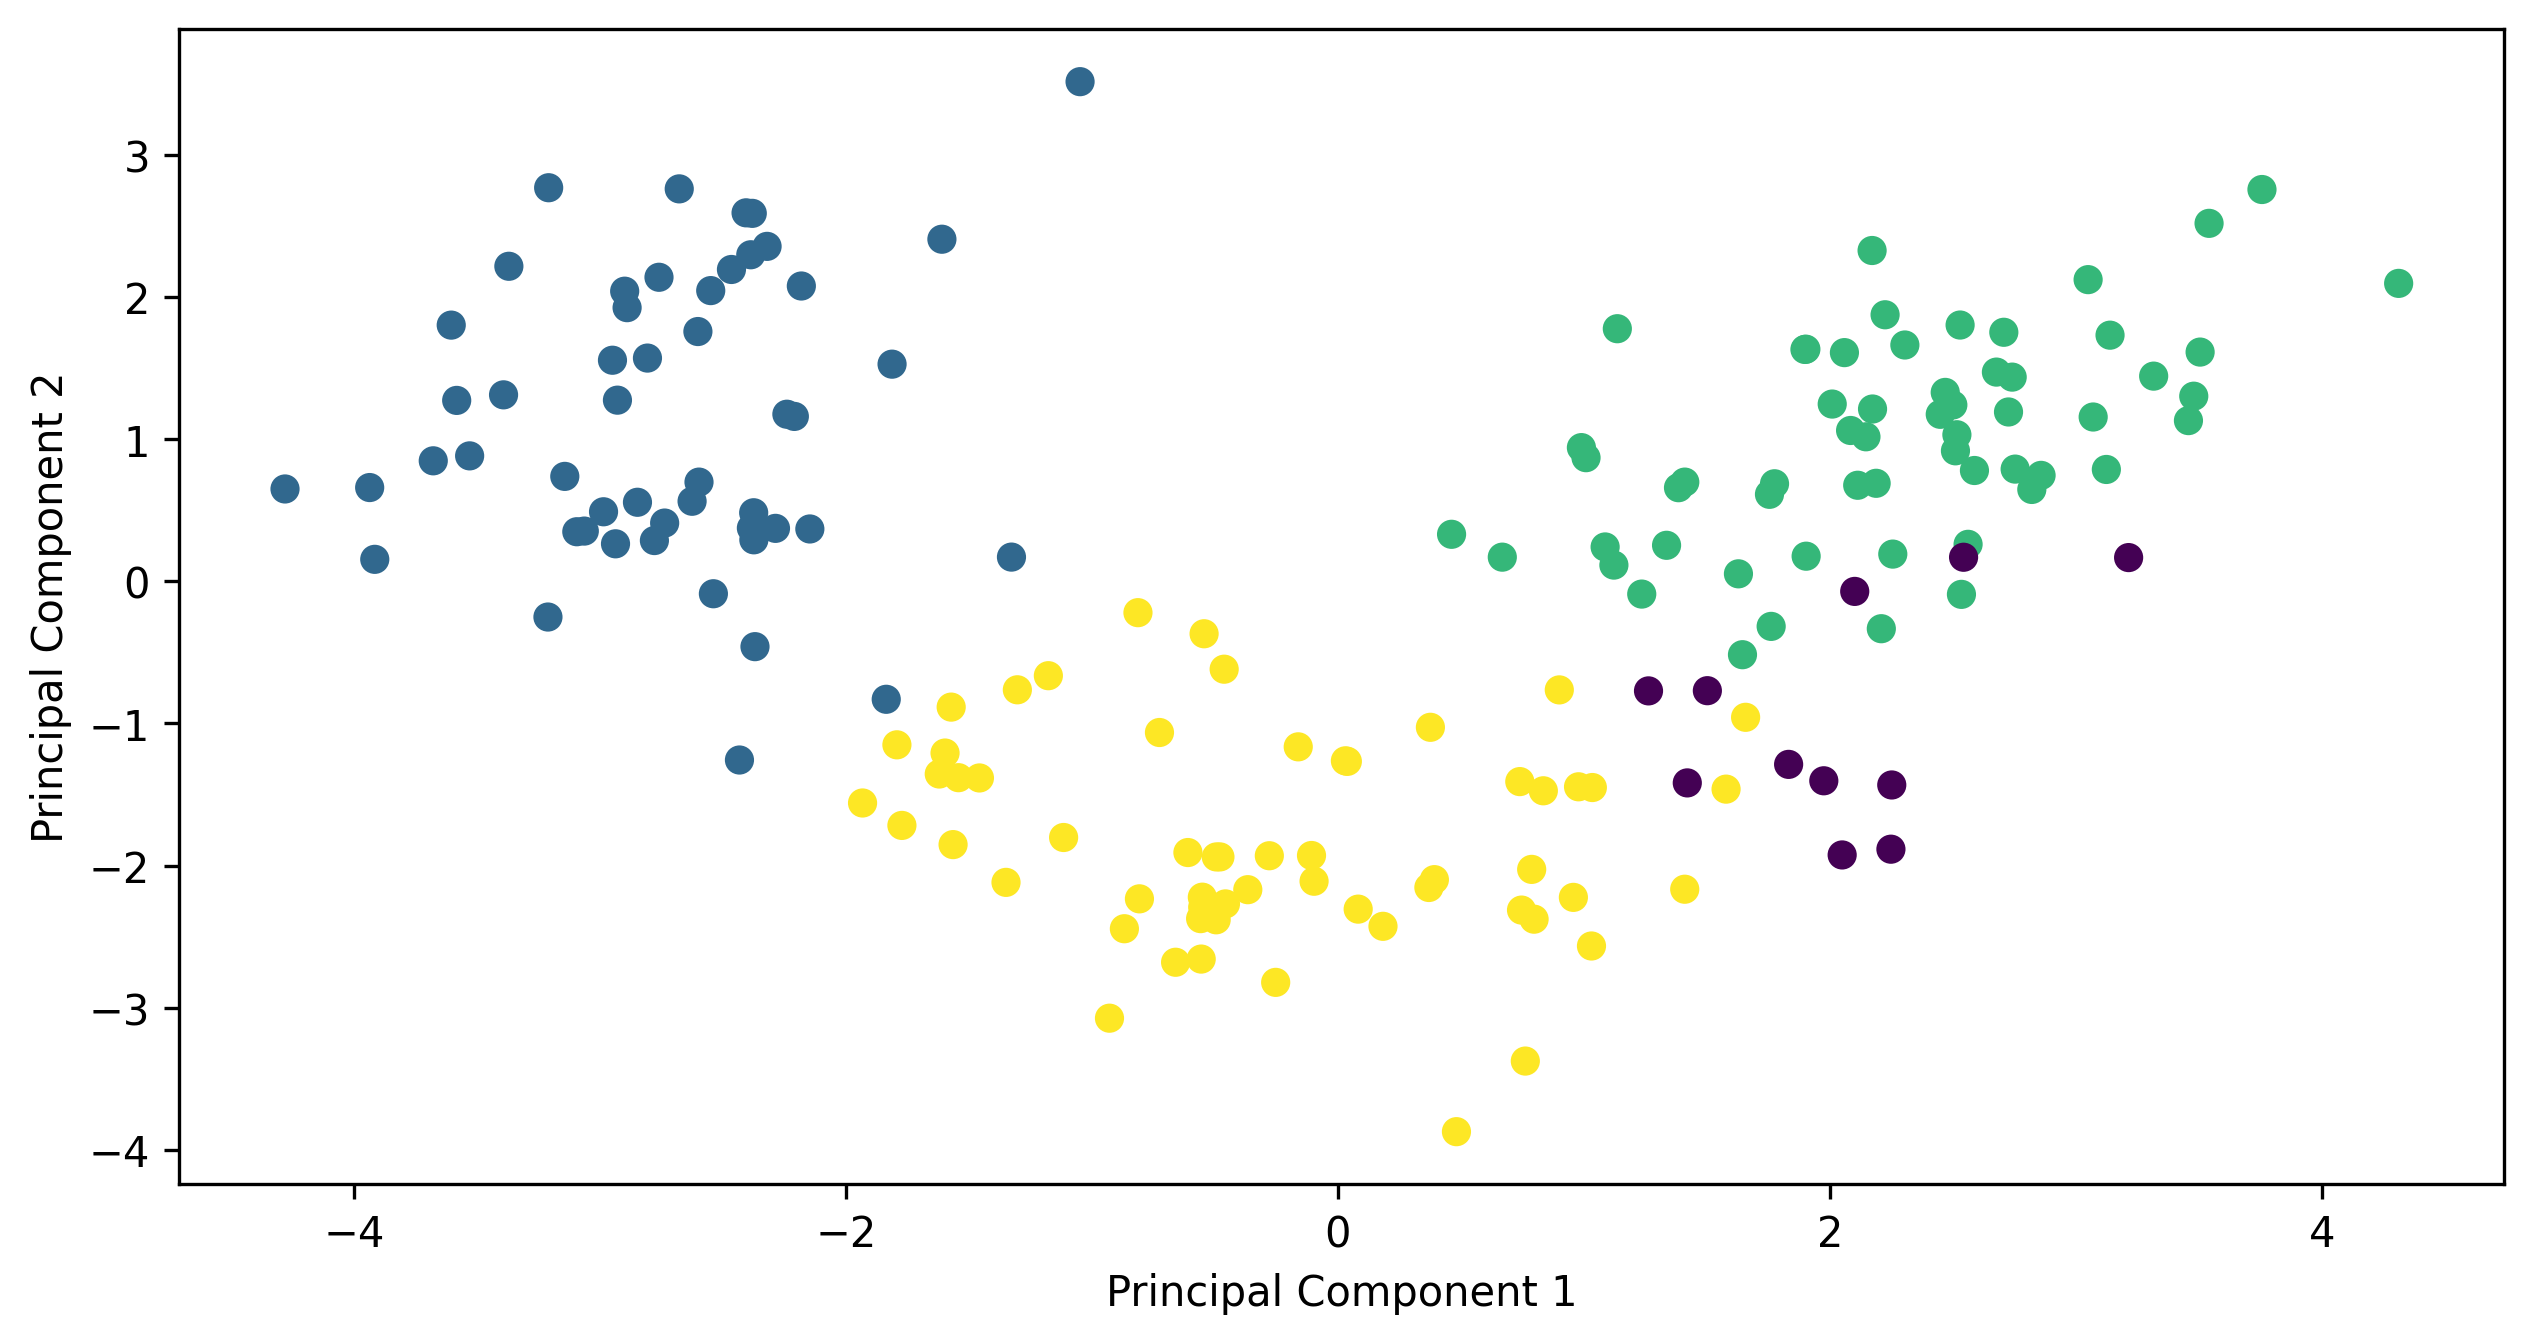

In [ ]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters_pca)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
silhouette_pca = silhouette_score(principalComponents, clusters_pca)
print(silhouette_pca)

0.28485891918989886


Original Data - Silhouette Score: 0.5711220218931753, Davies-Bouldin Index: 0.5342660703679686
PCA Data - Silhouette Score: 0.28485891918989886, Davies-Bouldin Index: 1.3891879777181637


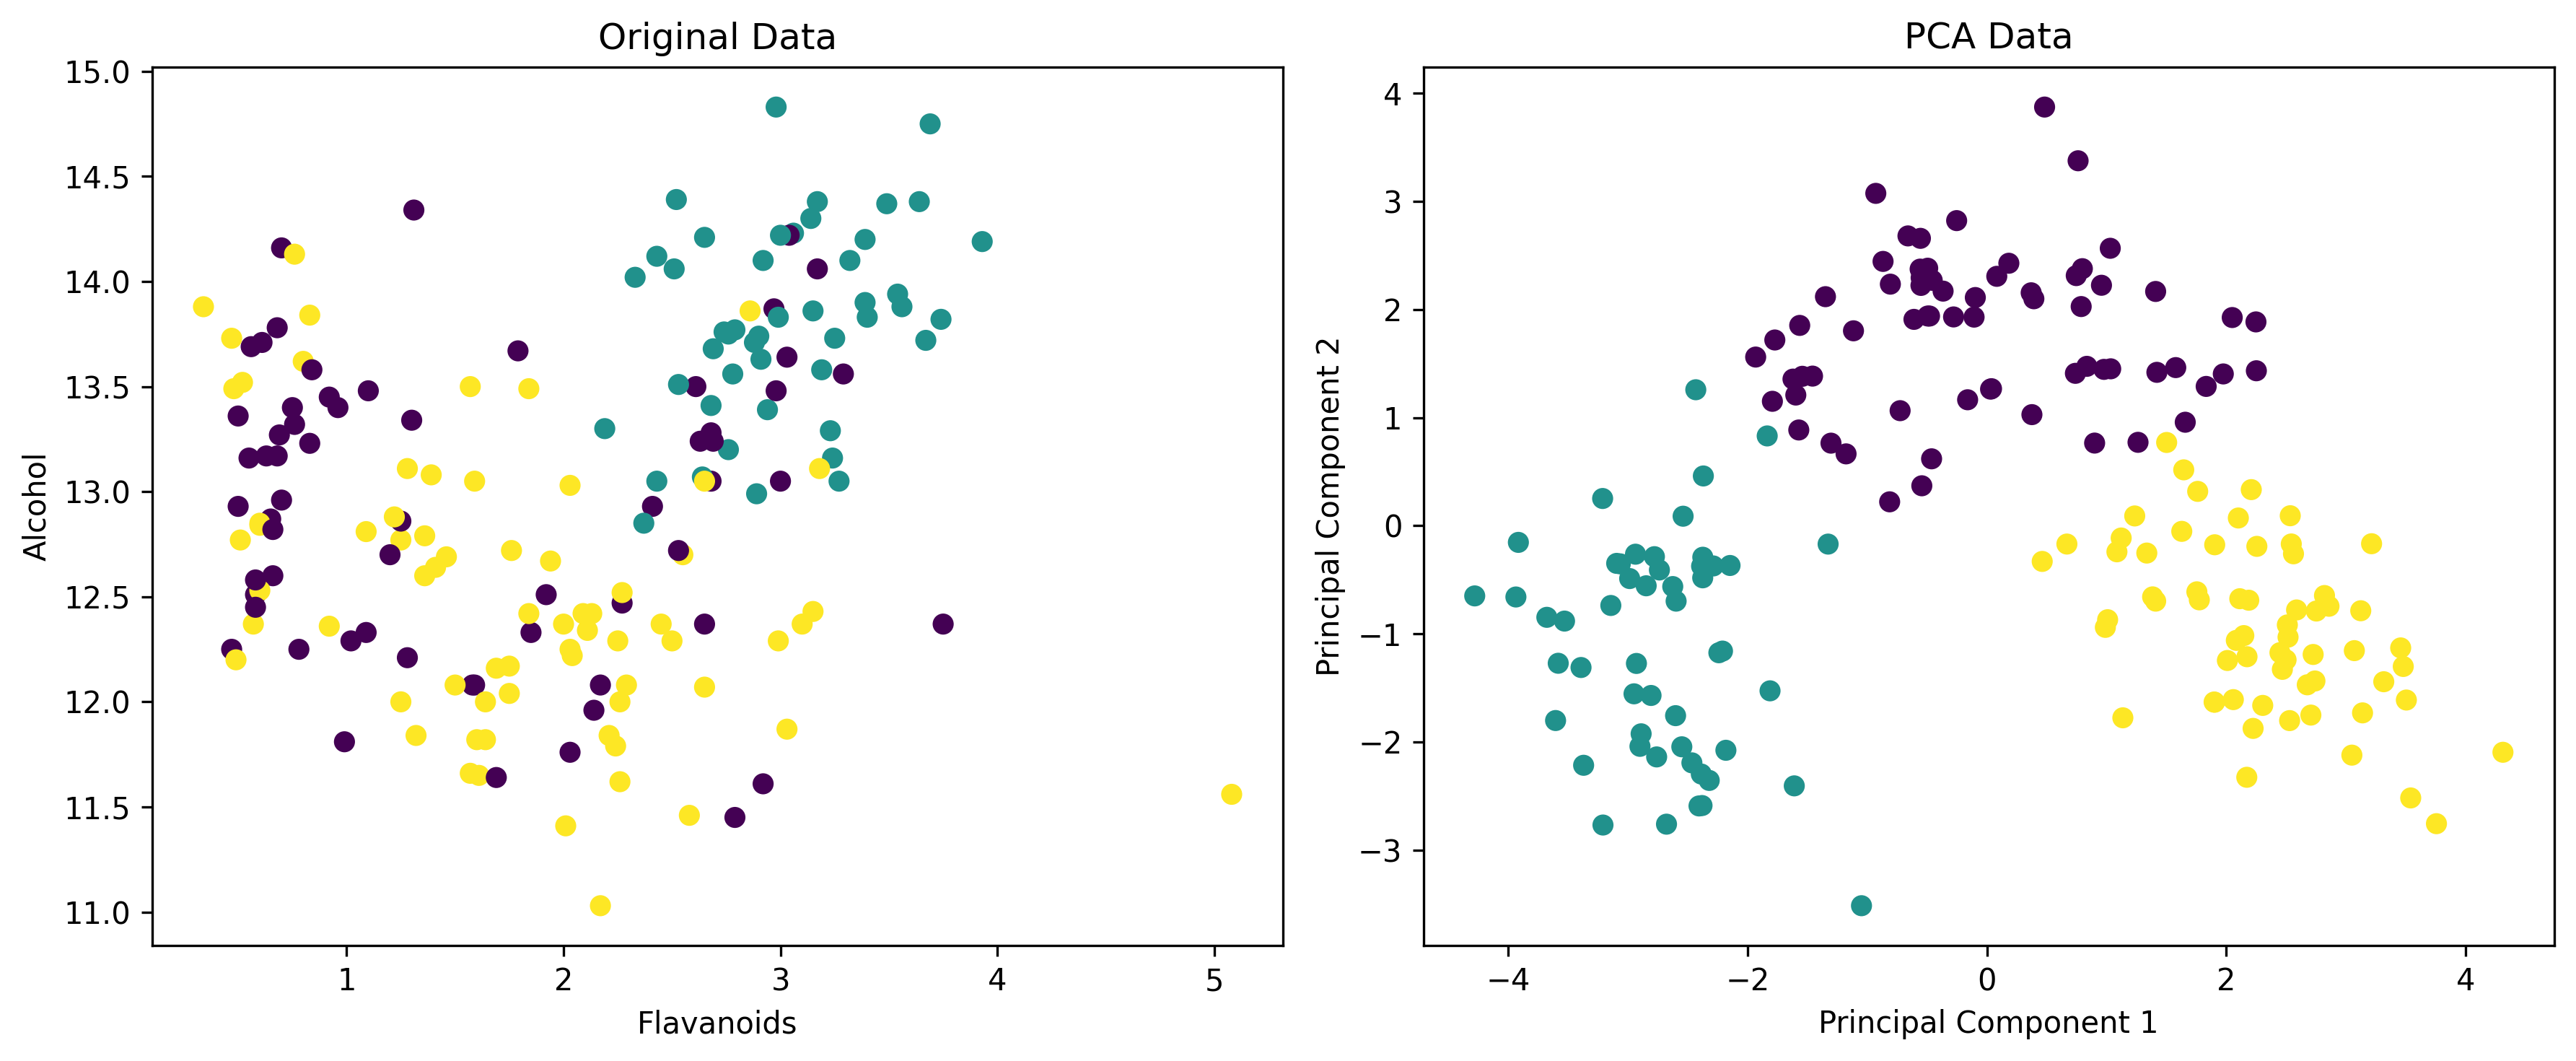

In [ ]:
# Calculate Silhouette and Davies-Bouldin scores for both datasets
silhouette = silhouette_score(wine, clusters)
davies_bouldin = davies_bouldin_score(wine, clusters)

silhouette_pca = silhouette_score(principalComponents, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(principalComponents, clusters_pca)

# Print the scores
print(f'Original Data - Silhouette Score: {silhouette}, Davies-Bouldin Index: {davies_bouldin}')
print(f'PCA Data - Silhouette Score: {silhouette_pca}, Davies-Bouldin Index: {davies_bouldin_pca}')

# Visualize the clusters for both datasets (adjust features as needed)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(wine['Flavanoids'], wine['Alcohol'], c=clusters)
plt.xlabel('Flavanoids')
plt.ylabel('Alcohol')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters_pca)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Data')

plt.tight_layout()
plt.show()